# Convolutional Neural Networks

### Lesson 1: CNN
Very effective in recognizing patterns within images by understanding that spatial structure is important and can use that data for their benefit. Require fewer parameters compared to ANNs. Comparing CNN and NN is the input layer and the fully connected layer (multilayer perceptron parameter that uses weights and biase values and use the softmax activation funciton in the output layer). Highest probability that the image belongs in a class is the output. 

CNN stems from the convolution part. Process data that has a known grid-like topology, so cnn used to solve image dirven pattern recognition tasks. DNN will often struggle with the complexity, previously we did it with MNIST, because the 28x28 dimensions were manageable by the feed forward. But overall not scalable for larger or colored images. 

If we're using colored RBG with 72x72 pixels. That means we have 15552 pixel intensities...and so this would be that many weights parameterizing for each node. Way too complex for a DNN! But with CNN, this is computationally manageable. 

Drawback with NN: Overfitting. Cannot generalize. But with CNN, pooling layers will act to continuously reduce the number of parameters in computations in the network. 

### Lesson 2: Convolutional Layer

CNN's are a specialized form of ANN. Based on the number of hidden layers, this determines the depth and complexity of the neural network. With learning rates, we can adjust the weights and connections to the neurons and come up with a model. 

CNN has three types of layers: convolutional, pooling, and fully connected layers. Input layer is where we pass the pixel values of the images (784 nodes) and also have 10 output nodes (class). Still going to make use of softmax function to make the final prdiction. 

In between are the series of convolutional, pooling and then fully connected layers. Main building block is the convolutional layer: primary goal is to extract and learn specific image features that can help classify the image. Each input will correspond to an input node and all the pixels will be processed bye a convolution or a filter (also known as a kernel or a kernel matrix). Kernels are usually small in spatial dimensionality. The convlution opperation is done by sliding the kernel at every location of the image by a certain stride. 

Receptive field - image is corresponding to the size of the kernel. Multiply the receptive field by the corres. cell in the kernel. The summ of the numbers and divide by the number of pixels in the field and then goes to a feature map. 

When we've convolved the kernel over the entire image we result in a feature map. We get an edge between large and small pixel intensities. This is called a feature map because it contains a specific feature of interest that was extracted from the original image. Kernel is therefore the feature detector. Every kernel is designed to have a specific set of weights (distinguishes each kernel from each other). 

The values of weights in kernel learned by CNN during training process. With gradient descent, to minimize error, the weights of the kernels will be changed best to detect features. 

Translational in a variance. Sharing weights...your network can learn a single filter for a feature. More filter...more features we can extract and ultimately improve the nn ability. When we combine all the feature maps we get a final output of the convolution of a layer. Deeper resulting feature map, more features we've extracted. 

This is 2D convolution. Which is what will be used for MNIST. If use a 3D image, then we need to have a 3D kernel. 

Relu activation function - used to introduce non-linearity to the feature map. It converts negative feature map to zeros. Could also use sigmoid and tanh but relu will perform better in most situations. Relu is biologically insprired - neural activity doesn't follow sigmoid function (positive and negative). But rather the lowest activvity is zero and action potential is ramped up from there. 

Sigmoid and Tanh prediscposed to vanishing gradient issue. If gradient and network gets too small...then can't use gradient descent and learning slows a lot. 

### Lesson 3: Convolutions II

The goal is to pass a digit into the CNN and the network will determine the best class to which the image belongs to. CNN will analyze image feature by feature and break down the images into parts to find similarities between theimage and the class it should be classified. 

Example is an 'X' image. Has a filter of 'x' '\' and '/' 

#### Apply kernel to the image to get feature map 
Different filters and kerenls used. Each kernel will correspond to a feature in the image...then we convulse each filter over the entire image. Multiply each pixel in the image by the corresponding kernel value and add up then divide the total number of pixels. That resulting value is placed into a feature map. By convolving the filter over the entire image, you get a feature map. We are checking out well the feature matches a specific piece in the image. Higher the number the more similar the feature in the feature map shows us that it's most similar to the feature of interest. 

Stack the feature maps along the depth dimenion to form the full ouput volume from the convolutional layer. By passing original input image through the convoutional layer, the three filters (three different features), producing a filtered image consistent with the feature of interest. More filters = more filtered images, so we can improve the accuracy to pinpoint specific features in the image. 

After processing, we use an activation funciton. Apply relu function to the filtered images to account for non-linearity; by changing negative values to zero. After applying relu, then the filtered images can be processed in the pooling layer. 

Helps us filter out specific features from the images - resulting in a stack of filtered images. 

### Lesson 4: Pooling

When we get filtered images these images are consistent with specific features of the image itself. This then goes through pooling layer which acts to shrink the image stack by reducing the dimensionality of the representation of each feature map (reduce the computational complexity of the model but retains the most important information of features). Pooling helps avoid overfitting. 

Different types of pooling operation: sum, average, max. Going to focus on max pooling, which reports max output within a rectangular neighborhood. 2D kernel convolve throughout the feature map, going to shift through, and take only the max value of the feature maps. It scales the feature map size to only account for the max values but still retains the feature of interest. 

Need to scale down because it reduces the computational cost by reducing the number of parameters in the image. Helps Reduce overfitting by abstracting the original feature map but preserces the general patterns (even though it's half the size of the original filtered image). Max value will pick up the max value in respective neighborhood, and provides a scale invariant representation of the image. Allows to detect features in an image no matter where it is located. = can generalize features to more than one image!

A stack of smaller filtered images in the pooling layer results. Pooling is destructive so kernel is small. More convolutions and pooling layers added to furuther filter the image. More feature maps extract more useful features. Then apply relu for nonlinearity. Then apply max pooling to scale down the feature map. 

Deeper the network, more filters build onto each other and more complex patterns can be encoded. Lower level images correspond to simple aspects of the image while higher level images correspond to more sophisticated features (shapes and patterns that will help the network classify). Going deeper in the NN, the more unrecognizable the feature maps become. Kernels also get more complex as go deeper, building off each other. Filters encode for distinct high level shapes and have more information for a feature that's distinct to the kernel involved on the image. 

https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html is a cool website that you can see CNN in action. 

Once the convolutional and pooling layers get the feature extraction and data representation. The necessary features then go to the fully connected layers to classify the data. 

### Lesson 5: Fully Connected Layers
CNN don't actually know what the image is...but after encountering many training images, it learns to detect image as meaningful feature. ONce get the required features, we then need a classifer to assign probability for the input image belonging to some class. 



### Lesson 6: Coding CNN

Implementing CNN with the MNIST dataset many models done. Model we focus on is the LeNet model which is similier than the other ones. 

2 convolutional layers each followed by a pooling layer. Then followed by 2 fully connected layers that actually classifies the input data.

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                                ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#training_dataset
validation_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
##validation_dataset. Needs to be 20% of the training data

#need to divide images into batches
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
#with shuffle, to ensure reach a global minimum rather than local min with gradient descent

##validation loader
validation_loader =  torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)
##not going to be training the model based on the validation data, so we don't need to shuffle

In [3]:
def im_convert(tensor):
    #cannot convert cuda tensor to numpy. need cpa
    #so if use cuda use:
    # image = tensor.cpu().clone().detach().numpy()
    image = tensor.clone().detach().numpy() #before making a numpy array
    image = image.transpose(1, 2, 0) #to get a 28, 28, 1 shape
    #denormalize image
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

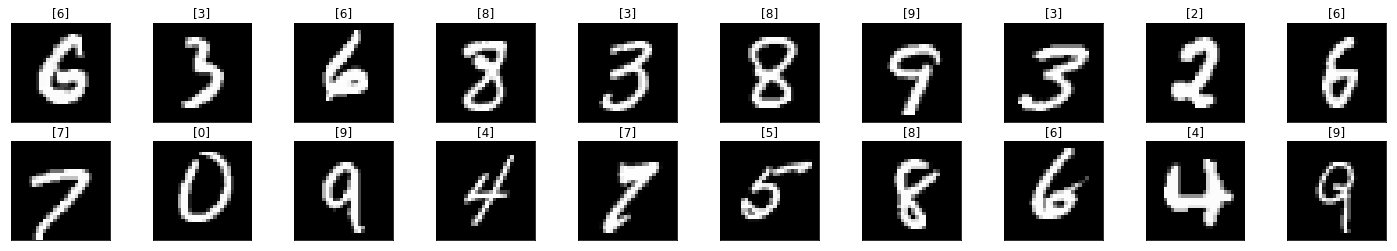

In [4]:
dataiter = iter(training_loader)
images, labels = dataiter.next() #grab first batch of training data and split by images and labels
fig = plt.figure(figsize=(25, 4))


for idx in np.arange(20):
    #2 rows and 10 columns, idx starts at 0 so need to add 1
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    #image[idx] is a tensor. so we use im_convert to get numpy
    #get rid of tick marks by setting them to empty list
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

In [6]:
class LeNet(nn.Module):
    
    #redo for CNN instead! 
    def __init__(self):
        super().__init__()
        #define a convolutional layer
        self.conv1 = nn.Conv2d(1, 20, 5, 1) 
        #input layer of conv1 only has 1 layer
        #next is the numbe rof output channels
        #kernel size is 5, stride is 1 (input images are small so we don't need a larger stride)
        #bigger stride could result in less effective feature estraction
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        #define the fully connected layers
        self.fc1 = nn.Linear(4*4*50, 500) #50 channels with 4x4 iamge
        self.fc2 = nn.Linear(500, 10) #output because 10 classes
    
    #define the pooling and activation functions
    def forward(self, x):
        x = F.relu(self.conv1(x))
        #pooling layer
        x = F.max_pool2d(x, 2, 2)
        #second conv layer
        x = F.relu(self.conv2(x))
        #pooling layer
        x = F.max_pool2d(x, 2, 2)
        #reshape x, need to flatten so it can go into FC layer
        x = x.view(-1, 4*4*50) #columns (decided automatically), rows
        #attach relu to first FC layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x) #no activation funciton here because going to use nn Cross entropy loss
        return x 

In [7]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

Using google collab gpu? 

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001) 

In [12]:
#specifiy number of epochs
epochs = 15
#want to analyze loss after each epoch so need to graph
running_loss_history = []
running_corrects_history = [] #store accruacy at each epoch

##validation part
val_running_loss_history = []
val_running_corrects_history = []

#iterate through each epoch
for e in range(epochs):
    #need to go through each training batch provided by training loader
    running_loss = 0.0
    running_corrects = 0.0
    
    ##after training, we iterate through validation set to test our data
    #measure performance to check for overfitting 
    ##validation
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs) #call the forward function to get raw final score
        #output is compared to actual labels
        loss = criterion(outputs, labels) #compare and determine error based on cross entropy criterion
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1) #first value is max score that was made by the model
        running_loss += loss.item() #append the current loss at the batch iteration to the loss list
        #want to compare the prediction to the actual label to see how many got correct
        #second value will be top predictions
        running_corrects += torch.sum(preds == labels.data) #every element of both tensors, compare the prediction to the actual class label
        #if comparision matches, then will place a value of one
    
    
    else:
        with torch.no_grad(): #set all requires grad flags to be false
        ##validation
            for val_inputs, val_labels in validation_loader: 
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                #make predictions and calculate loss for validation
                val_outputs = model(val_inputs)
                
                val_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
                
        epoch_loss = running_loss/len(training_loader) #get the average loss at the epoch
        epoch_acc = running_corrects.float()/ len(training_loader) #average accuracy at that epoch
        #now append
        running_loss_history.append(epoch_loss) #observe decrease in loss at every epoch
        running_corrects_history.append(epoch_acc)
        
        ##same for validation
        val_epoch_loss = val_running_loss/len(validation_loader)
        val_epoch_acc = val_running_corrects.float()/ len(validation_loader) 
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
        
        print('epoch :', (e+1)) #because epoch starts at 0
        print('training loss: {:.4f}, acc {:.4f}'.format(epoch_loss, epoch_acc.item()))
        print('validation loss: {:.4f}, validation acc {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.2671, acc 92.4083
validation loss: 0.1542, validation acc 95.4617
epoch : 2
training loss: 0.1201, acc 96.4917
validation loss: 0.0970, validation acc 97.1167
epoch : 3
training loss: 0.0818, acc 97.5833
validation loss: 0.0704, validation acc 97.9183
epoch : 4
training loss: 0.0634, acc 98.1250
validation loss: 0.0562, validation acc 98.3700
epoch : 5
training loss: 0.0533, acc 98.3900
validation loss: 0.0474, validation acc 98.5983
epoch : 6
training loss: 0.0457, acc 98.6383
validation loss: 0.0410, validation acc 98.7883
epoch : 7
training loss: 0.0410, acc 98.7550
validation loss: 0.0352, validation acc 98.9317
epoch : 8
training loss: 0.0351, acc 98.9150
validation loss: 0.0322, validation acc 99.0167
epoch : 9
training loss: 0.0317, acc 99.0133
validation loss: 0.0260, validation acc 99.2267
epoch : 10
training loss: 0.0287, acc 99.1183
validation loss: 0.0242, validation acc 99.2850
epoch : 11
training loss: 0.0256, acc 99.2200
validation loss: 0.0236

Looking at the training process, the network is starting better than the DNN (which was around 70% before). The loss is also much lower. Accuracy seems to be converging to higher values and the loss goes down. Shows the effectiveness of CNN. Training and validation approaches 99%

If the training accuracy increases higher than the validation then we will know that there's overfitting.

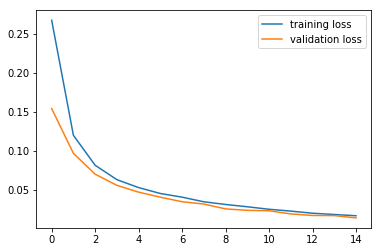

In [13]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

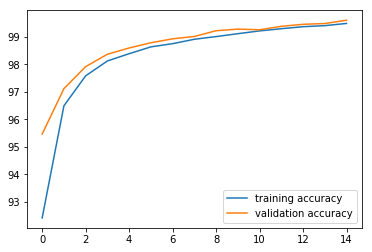

In [14]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

If overfitting does occur, one way to avoid this is to use a drop out layer within the neural network. Going back to the LeNet class, we can add the layer type called a Dropout layer. Randomly sets a fraction of the input units to zero (turn off), which prevents overfitting. Some nodes are turned off and will not communicate along the network. Everytime the network updates, it seelectes random nodes to turn off and then each update a different set of nodes are turned off/on. Forces the nn to use various combinations to classify the same data and so each node is forced to learn the data in a more independent way (unique arrangement each time).

The nn becomes more versaitle and weights become more uniform along the network. 

In [15]:
class LeNet(nn.Module):
    
    #redo for CNN instead! 
    def __init__(self):
        super().__init__()
        #define a convolutional layer
        self.conv1 = nn.Conv2d(1, 20, 5, 1) 
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        #define the fully connected layers
        self.fc1 = nn.Linear(4*4*50, 500) 
        #dropout layer can be between convolutional layers or b/w fc layer
        #usually put between high number of parameters 
        self.dropout1 = nn.Dropout(0.5) #recommended rate by researchers
        self.fc2 = nn.Linear(500, 10)
        
        
    #define the pooling and activation functions
    def forward(self, x):
        x = F.relu(self.conv1(x))
        #pooling layer
        x = F.max_pool2d(x, 2, 2)
        #second conv layer
        x = F.relu(self.conv2(x))
        #pooling layer
        x = F.max_pool2d(x, 2, 2)
        #reshape x, need to flatten so it can go into FC layer
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        #include dropout layer
        x = self.dropout1(x)
        x = self.fc2(x)
        return x 

In [16]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001) 

In [18]:
#specifiy number of epochs
epochs = 15
#want to analyze loss after each epoch so need to graph
running_loss_history = []
running_corrects_history = [] #store accruacy at each epoch

##validation part
val_running_loss_history = []
val_running_corrects_history = []

#iterate through each epoch
for e in range(epochs):
    #need to go through each training batch provided by training loader
    running_loss = 0.0
    running_corrects = 0.0
    
    ##after training, we iterate through validation set to test our data
    #measure performance to check for overfitting 
    ##validation
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs) #call the forward function to get raw final score
        #output is compared to actual labels
        loss = criterion(outputs, labels) #compare and determine error based on cross entropy criterion
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1) #first value is max score that was made by the model
        running_loss += loss.item() #append the current loss at the batch iteration to the loss list
        #want to compare the prediction to the actual label to see how many got correct
        #second value will be top predictions
        running_corrects += torch.sum(preds == labels.data) #every element of both tensors, compare the prediction to the actual class label
        #if comparision matches, then will place a value of one
    
    
    else:
        with torch.no_grad(): #set all requires grad flags to be false
        ##validation
            for val_inputs, val_labels in validation_loader: 
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                #make predictions and calculate loss for validation
                val_outputs = model(val_inputs)
                
                val_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
                
        epoch_loss = running_loss/len(training_loader) #get the average loss at the epoch
        epoch_acc = running_corrects.float()/ len(training_loader) #average accuracy at that epoch
        #now append
        running_loss_history.append(epoch_loss) #observe decrease in loss at every epoch
        running_corrects_history.append(epoch_acc)
        
        ##same for validation
        val_epoch_loss = val_running_loss/len(validation_loader)
        val_epoch_acc = val_running_corrects.float()/ len(validation_loader) 
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
        
        print('epoch :', (e+1)) #because epoch starts at 0
        print('training loss: {:.4f}, acc {:.4f}'.format(epoch_loss, epoch_acc.item()))
        print('validation loss: {:.4f}, validation acc {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.5708, acc 84.5600
validation loss: 0.1970, validation acc 94.2033
epoch : 2
training loss: 0.1490, acc 95.5433
validation loss: 0.1139, validation acc 96.7833
epoch : 3
training loss: 0.1005, acc 96.9583
validation loss: 0.0888, validation acc 97.3217
epoch : 4
training loss: 0.0795, acc 97.5533
validation loss: 0.0676, validation acc 97.9483
epoch : 5
training loss: 0.0653, acc 98.0167
validation loss: 0.0602, validation acc 98.2383
epoch : 6
training loss: 0.0568, acc 98.2800
validation loss: 0.0500, validation acc 98.4667
epoch : 7
training loss: 0.0497, acc 98.4883
validation loss: 0.0443, validation acc 98.6817
epoch : 8
training loss: 0.0457, acc 98.5883
validation loss: 0.0404, validation acc 98.7683
epoch : 9
training loss: 0.0402, acc 98.7550
validation loss: 0.0388, validation acc 98.7917
epoch : 10
training loss: 0.0369, acc 98.8667
validation loss: 0.0326, validation acc 99.0133
epoch : 11
training loss: 0.0341, acc 98.9700
validation loss: 0.0316

We can see no overfitting really. The loss and accuracy are even closer to each other!

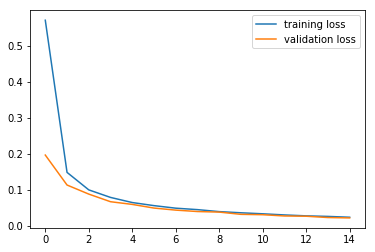

In [19]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

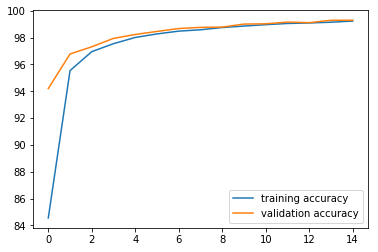

In [20]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

<Response [200]>


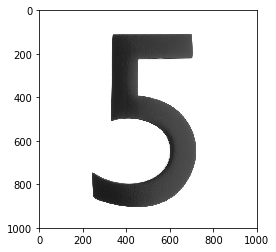

In [21]:
import requests #to grab an image
from PIL import Image #python imaging library
import PIL.ImageOps
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
print(response) #successful get request

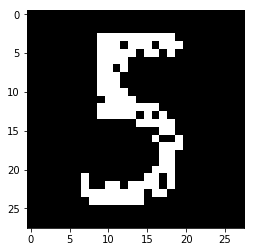

In [22]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img) #ensure 28x28 with transform function
plt.imshow(im_convert(img))

#looks pretty close to MNIST iamges

In [28]:
images = img.to(device)
image = images[0].unsqueeze(0).unsqueeze(0)
#this willa ccount for the extra dimensionality 
output = model(image)
_, pred = torch.max(output, 1)
print(pred.item()) #redicts the accurate value of 5! 

5


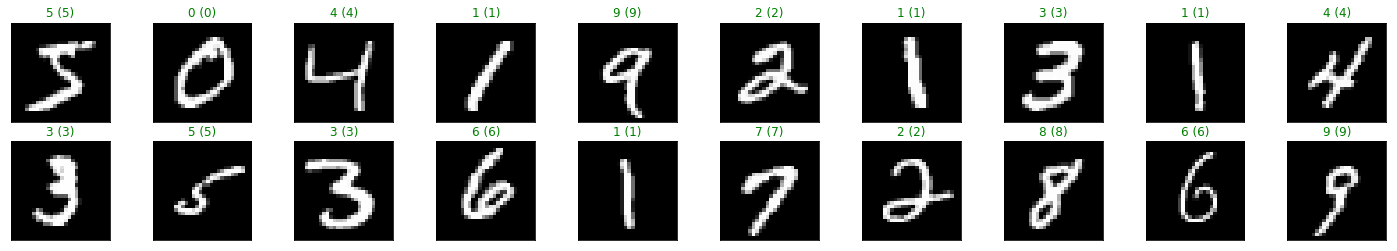

In [30]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    #modifying the title for each image
    #set green if the label is correct, red if label is incorrect
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))


Model predicts all the test images! 